In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Imports Libraries and Dataset

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
data_dir = "../input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)"
train_dir = data_dir + "/train"
valid_dir = data_dir + "/valid"

In [3]:
training_set = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


In [4]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    valid_dir,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


# Build Model 

In [6]:
cnn = Sequential()
# First convolutional block
cnn.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[128, 128, 3]))
cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(MaxPooling2D(pool_size=2, strides=2))

# Second convolutional block
cnn.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
cnn.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(MaxPooling2D(pool_size=2, strides=2))

# Third convolutional block
cnn.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
cnn.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
cnn.add(MaxPooling2D(pool_size=2, strides=2))

# Fourth convolutional block
cnn.add(Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
cnn.add(Conv2D(filters=256, kernel_size=3, activation='relu'))
cnn.add(MaxPooling2D(pool_size=2, strides=2)) 

# Fifth convolutional block
cnn.add(Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))
cnn.add(Conv2D(filters=512, kernel_size=3, activation='relu'))
cnn.add(MaxPooling2D(pool_size=2, strides=2))

# Dropout layer
cnn.add(Dropout(0.25))

# Flatten the output
cnn.add(Flatten())

# Dense layers
cnn.add(Dense(units=1500, activation='relu'))
cnn.add(Dropout(0.4))  # To avoid overfitting
cnn.add(Dense(units=38, activation='softmax'))

cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), 
             loss='categorical_crossentropy', 
             metrics=['accuracy'])

cnn.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

# Train

In [8]:
# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
history = cnn.fit(x = training_set, validation_data = validation_set,epochs=30)

Epoch 1/30
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 178s 75ms/step - accuracy: 0.3934 - loss: 2.1650 - val_accuracy: 0.8322 - val_loss: 0.5296
Epoch 2/30
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 128s 58ms/step - accuracy: 0.8278 - loss: 0.5454 - val_accuracy: 0.8782 - val_loss: 0.3980
Epoch 3/30
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 127s 58ms/step - accuracy: 0.9003 - loss: 0.3096 - val_accuracy: 0.9273 - val_loss: 0.2216
Epoch 4/30
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 127s 58ms/step - accuracy: 0.9302 - loss: 0.2151 - val_accuracy: 0.9379 - val_loss: 0.1908
Epoch 5/30
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 127s 58ms/step - accuracy: 0.9507 - loss: 0.1511 - val_accuracy: 0.9464 - val_loss: 0.1736
Epoch 6/30
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 127s 58ms/step - accuracy: 0.9609 - loss: 0.1212 - val_accuracy: 0.9517 - val_loss: 0.1597
Epoch 7/30
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 127s 58ms/step - accuracy: 0.9661 - loss: 0.1041 - val_accuracy: 0.9646 - val_loss: 0.1125
Epoch 8/30
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 127s 58ms/step - accuracy: 

# Evaluate n Save

In [35]:
train_loss, train_acc = cnn.evaluate(training_set)
print("Training Accuracy: ", train_acc)
print("Training Accuracy: ", train_loss)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 35s 16ms/step - accuracy: 0.9963 - loss: 0.0118
Training Accuracy:  0.9962016940116882
Training Accuracy:  0.012145214714109898


In [34]:
val_loss, val_acc = cnn.evaluate(validation_set)
print("Training Accuracy: ", val_acc)
print("Training Accuracy: ", val_loss)

550/550 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.9702 - loss: 0.1122
Training Accuracy:  0.9710334539413452
Training Accuracy:  0.11415033787488937


In [25]:
cnn.save("plant-disease-detection-model.keras")

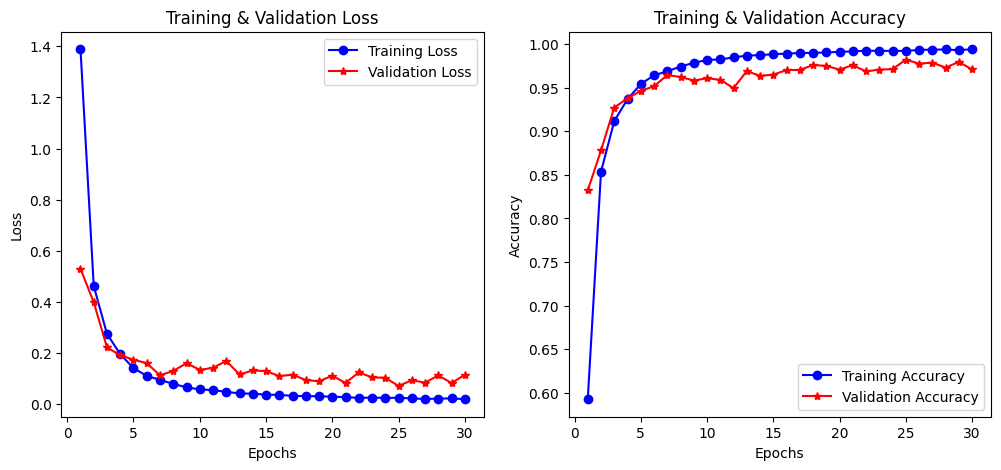

In [26]:
# Get training and validation accuracy/loss
history_dict = history.history
train_loss = history_dict['loss']
val_loss = history_dict['val_loss']
train_acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

# Create epochs range
epochs = range(1, len(train_loss) + 1)

# Plot Training & Validation Loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'bo-', label='Training Loss')  # 'bo-' -> blue dots with line
plt.plot(epochs, val_loss, 'r*-', label='Validation Loss')   # 'r*-' -> red stars with line
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()

# Plot Training & Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r*-', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()

plt.show()


In [27]:
class_name = validation_set.class_names
print(class_name)

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Sp

In [55]:
test_set = tf.keras.utils.image_dataset_from_directory(
    valid_dir,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [56]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis = 1)

17572/17572 ━━━━━━━━━━━━━━━━━━━━ 33s 2ms/step


In [57]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
y_true = tf.argmax(true_categories, axis=1)

In [58]:
y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [59]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [60]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_true, predicted_categories)

print(classification_report(y_true, predicted_categories, target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.98      0.95      0.96       504
                                 Apple___Black_rot       0.96      1.00      0.98       497
                          Apple___Cedar_apple_rust       0.96      0.99      0.98       440
                                   Apple___healthy       0.95      0.98      0.96       502
                               Blueberry___healthy       0.99      0.98      0.98       454
          Cherry_(including_sour)___Powdery_mildew       0.97      1.00      0.98       421
                 Cherry_(including_sour)___healthy       0.99      0.99      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.95      0.90      0.92       410
                       Corn_(maize)___Common_rust_       0.99      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.92      0.97      0.

# Test Model

In [47]:
cnn_model = tf.keras.models.load_model('/kaggle/working/plant-disease-detection-model.keras')

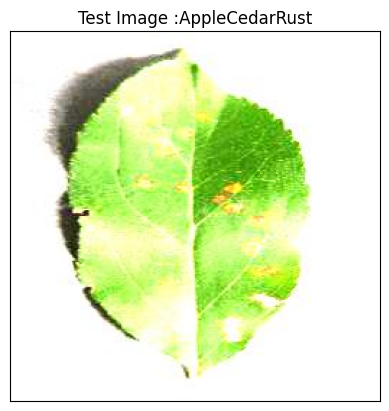

In [49]:
import cv2
img_path = '/kaggle/input/new-plant-diseases-dataset/test/test/AppleCedarRust1.JPG'

img = cv2.imread(img_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)


plt.imshow(img)
plt.title('Test Image :AppleCedarRust')
plt.xticks([])
plt.yticks([])
plt.show()

In [51]:
image = tf.keras.preprocessing.image.load_img(img_path, target_size=(128, 128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr]) # Convert single image to a batch
predictions = cnn_model.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


In [52]:
result_index = np.argmax(predictions) # Return index of max element
print(result_index)

2


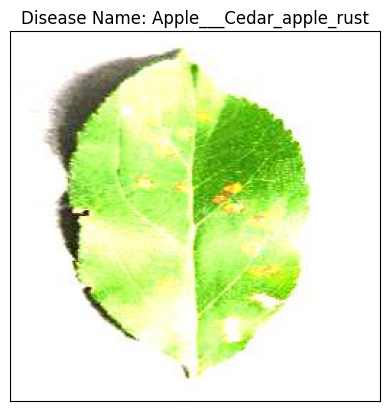

In [53]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img) # Assuming 'img' is the image you want to display
plt.title(f"Disease Name: {model_prediction}")

plt.xticks([])
plt.yticks([])

plt.show()